In [54]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
import math
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [9]:
data = pd.read_excel('marketing_customer_analysis.xlsx')
data.info
data.shape
data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [11]:
discrete_values = pd.DataFrame()
continuous_values = pd.DataFrame()
categorical_values = pd.DataFrame()

def check_dataypes(data):
    #standardise header names lower case
    data.rename(columns=str.lower)
    data = data.columns.str.lower().str.replace(' ','_')
    data.drop_duplicates()
    #classify the data
    numerical_discrete = data.select_dtypes(np.number)
    numerical_continuous = data.select_dtypes(include=['float64'])
    categorical = data.select_dtypes(object)
    
    return numerical_discrete,numerical_continuous,categorical

Show a plot of the total number of responses

In [ ]:
display(data['Response'].unique())
data['Response'].value_counts()
data['Response'].value_counts().plot(kind='bar')
#can be constructed using sns 

Show a plot of the response rate by the sales channel

In [ ]:
sns.set()
sns.countplot(data=data, x="Sales Channel", hue="Response")
plt.title("Response rate by sales channel")
plt.ylabel("Response given")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()


Show a plot of the response rate by the sales channel

In [ ]:
#sns.set()
#sns.countplot(data=data, x="Total Claim Amount", hue="Response")
#plt.title("response rate by the total claim amount")
#plt.ylabel("Response given")
#plt.xlabel("Total Claim Amount")
#plt.tight_layout()
#plt.show()


Show a plot of the response rate by income

Here I have tried to visualise the data with Box plots. From Tableau we understood that a Dimension like "Response" can be used to split the measurement like "Income"

In [ ]:
#sns.set()
#sns.boxplot(x = 'Income',y='Response', hue = "Response", data=data)
#plt.title(" plot of the response rate by income")
#plt.ylabel("Responses")
#plt.xlabel("Income")
#plt.tight_layout()
#plt.show()


#### Data cleaning Activities

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [13]:
discrete_values = pd.DataFrame()
continuous_values = pd.DataFrame()
categorical_values = pd.DataFrame()

def check_dataypes(data):
    numerical_discrete = data.select_dtypes(np.number)
    categorical = data.select_dtypes(object)
    
    # removing insignificant colomns from the numerical coloumns
    #categorical = categorical.drop(coloumns = ['customer','effective_to_date'], axis=1)
    
    return numerical_discrete,categorical

In [14]:
discrete_values,categorical_values = check_dataypes(data)
discrete_values

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
numerical_clean = pd.DataFrame()
categorical_clean = pd.DataFrame()

def clean_data_basic(discrete_values,categorical_values):
    
    #replace missing numericals with medians
    #replace missing categoricals with mode
    for col in discrete_values.columns:
        discrete_values[col] = discrete_values[col].fillna(np.median(discrete_values[col]))
    for col in categorical_values.columns:
        categorical_values[col] = categorical_values[col].fillna(categorical_values[col].mode())
     
    #standardise header names
    discrete_df = discrete_values.rename(columns=str.lower)
    discrete_df.columns = discrete_df.columns.str.replace(' ', '_')
    discrete_df.drop_duplicates() 
    cat_df = categorical_values.rename(columns=str.lower) 
    cat_df.columns = cat_df.columns.str.replace(' ', '_')
    cat_df.drop_duplicates() 
       
    return discrete_df,cat_df
    
    

In [16]:
numerical_clean,categorical_clean = clean_data_basic(discrete_values,categorical_values)

In [17]:
clean_df = pd.concat([numerical_clean, categorical_clean],axis=1)
clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer,state,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,BU79786,Washington,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,QZ44356,Arizona,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,AI49188,Nevada,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,WW63253,California,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,HB64268,Washington,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,LA72316,California,...,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,3096.511217,21604,79,14,28,0,1,379.200000,PK87824,California,...,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,8163.890428,0,85,9,37,3,2,790.784983,TD14365,California,...,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,7524.442436,21941,96,34,3,0,3,691.200000,UP19263,California,...,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables

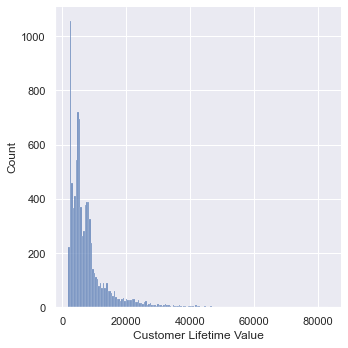

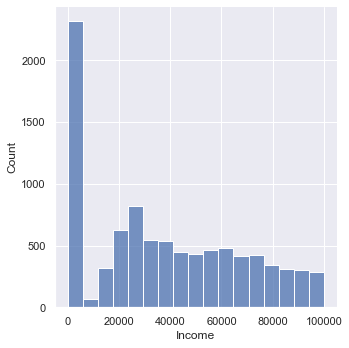

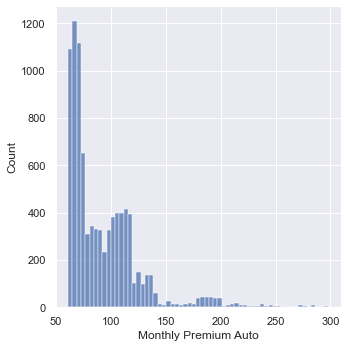

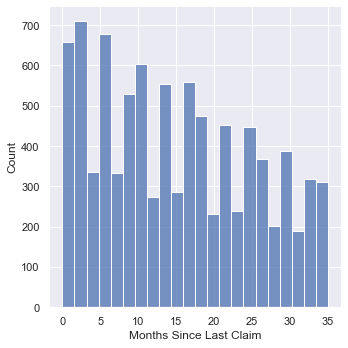

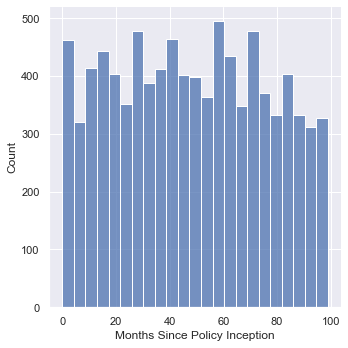

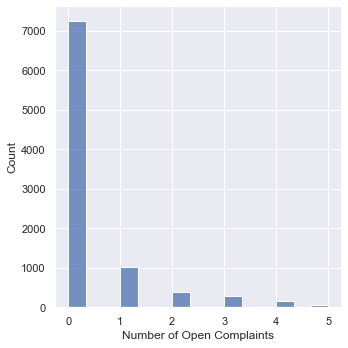

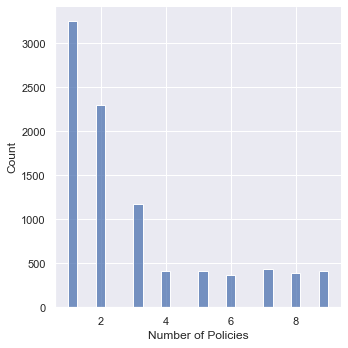

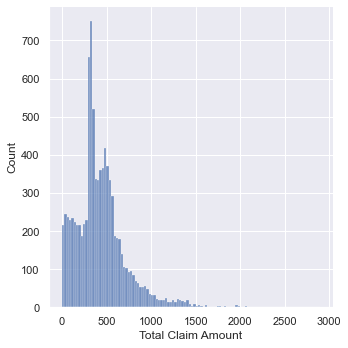

In [18]:
# plotting the discrete values
def plot_numericals(data):
    for col in data.columns:
        sns.set()
        sns.displot(x=data[col])

plot_numericals(discrete_values)


In [19]:
# plotting the continuous values
plot_numericals(continuous_values)

- Use Matplotlib to construct histograms

In [20]:
# plotting the discrete values
def plot_numericals_matplot(data):
    for col in data.columns:
        data[col].hist(bins=60)
        plt.show()

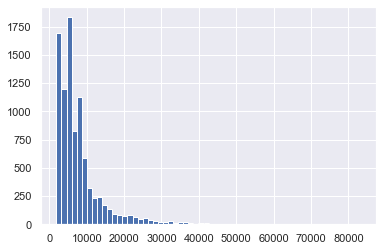

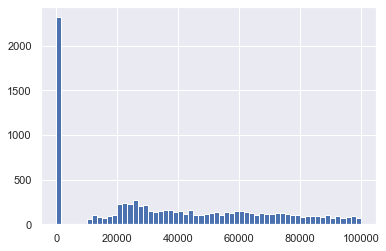

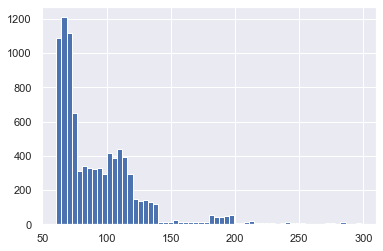

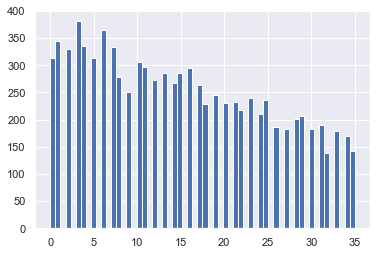

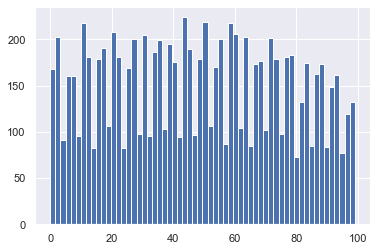

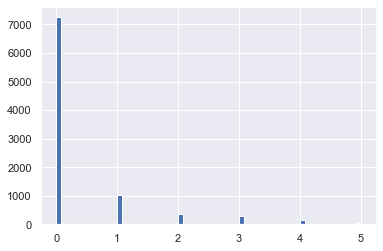

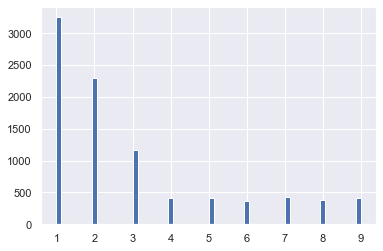

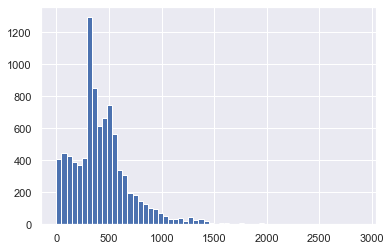

In [21]:
plot_numericals_matplot(discrete_values)

- Do the distributions for different numerical variables look like a normal distribution

--> No.they are not symmetrical like the normal distributions

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [22]:
# this can be done using a Heat map on the Numerical data set minus the 'total_claim_amount'

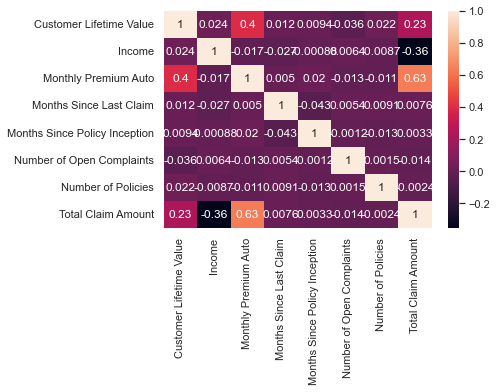

In [23]:
correlations_matrix = discrete_values.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#result it seems that the Customer Lifetime Value and Monthly Premium Auto

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

it seems there is none of the values that are highy correlated (either 0.9 or -0.9)

# solution to Lab 5 as follows

Processing Data (Further processing...)

X-y split.

In [24]:
y = discrete_values['Total Claim Amount']
X = discrete_values.drop(['Total Claim Amount'], axis=1)

X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.33, random_state=4)

# Split outputs
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

Normalize (numerical).

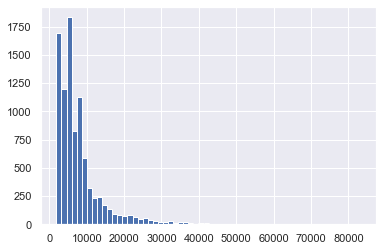

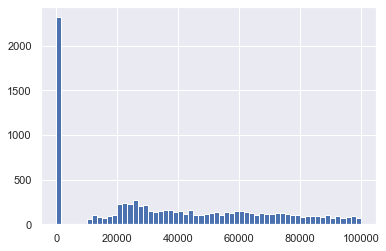

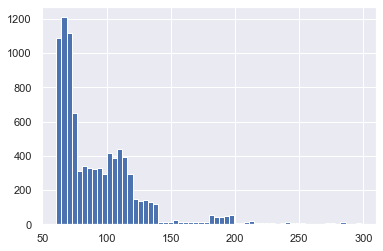

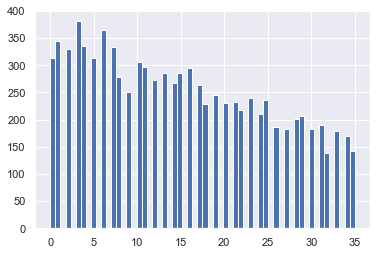

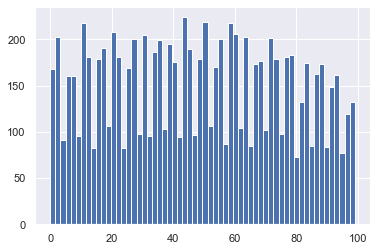

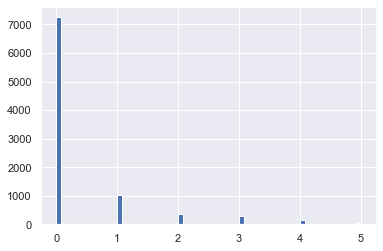

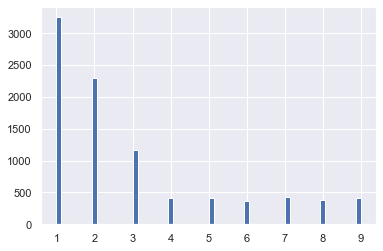

In [25]:
# before normalising
plot_numericals_matplot(X)

In [26]:
from sklearn.preprocessing import Normalizer
# Normalizing data
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)
x_normalised_df = pd.DataFrame(x_normalized, columns=X.columns)
x_normalised_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000000,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.000000,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000000,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.000000,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000000,0.000023
...,...,...,...,...,...,...,...
9129,0.309387,0.950935,0.000965,0.000238,0.001176,0.000000,0.000026
9130,0.141879,0.989876,0.003620,0.000641,0.001283,0.000000,0.000046
9131,0.999935,0.000000,0.010411,0.001102,0.004532,0.000367,0.000245
9132,0.324391,0.945913,0.004139,0.001466,0.000129,0.000000,0.000129


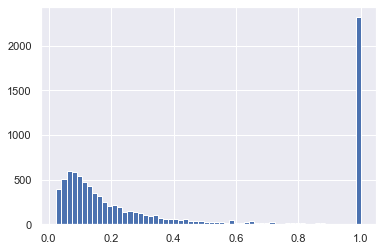

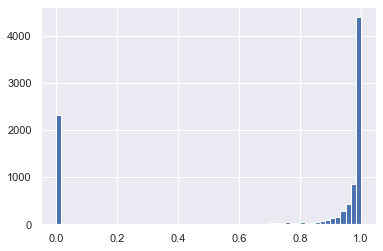

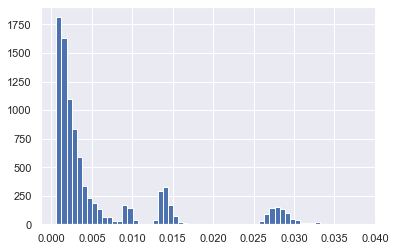

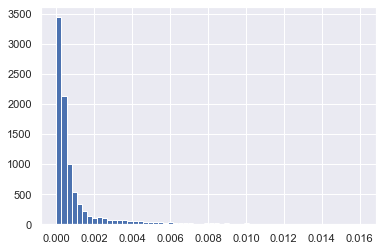

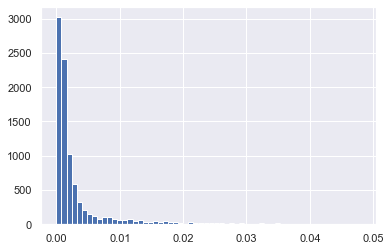

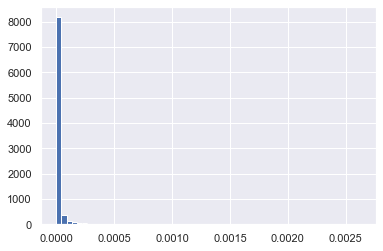

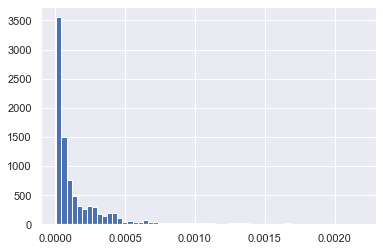

In [27]:
# we will replot the normalised data to inspect
# this can be done using Normalizer
plot_numericals_matplot(x_normalised_df)

In [28]:
print(f"Mean: {round(x_normalized.mean())}")
print(f"Standard Deviation: {round(x_normalized.std())}")

Mean: 0
Standard Deviation: 0


Not much normalisation is happenning, may be we should use coloumnwise standardisation..

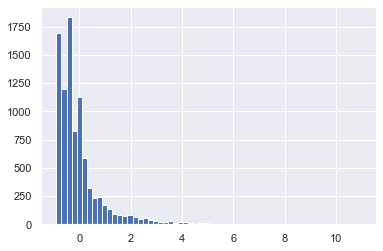

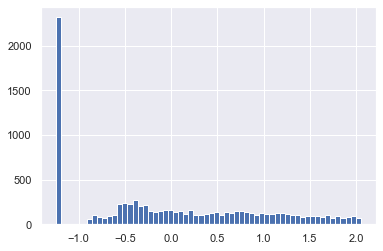

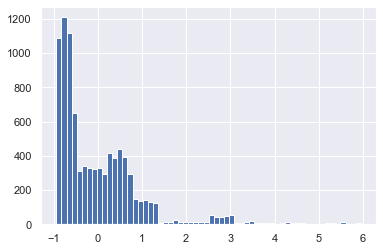

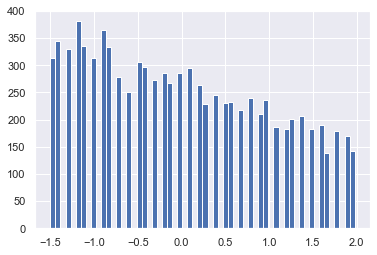

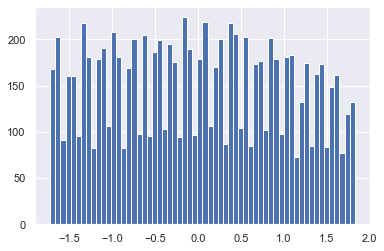

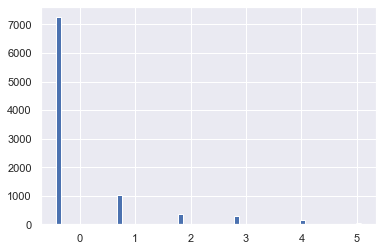

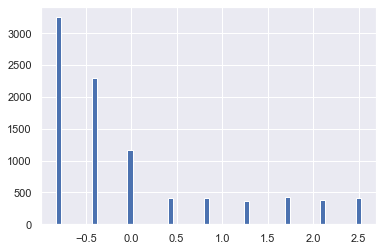

In [29]:
from sklearn.preprocessing import StandardScaler
# ing standard scaler
transformer = StandardScaler()
transformer.fit(X)
x_standardized = transformer.transform(X)
x_standardized_df = pd.DataFrame(x_standardized, columns=X.columns)
plot_numericals_matplot(x_standardized_df)


In [31]:
print(f"Mean: {round(x_standardized.mean())}")
print(f"Standard Deviation: {round(x_standardized.std())}")

Mean: 0
Standard Deviation: 1


# Lab 6 solutions

One Hot/Label Encoding (categorical).

In [32]:
categorical_values.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
#as we can see customer and date will make this complicated.. so we will drop them and use only the rest for hot encoding
categorical_values_to_hot_encode = categorical_values.drop(['Customer','Effective To Date'], axis=1)
new_cat_list_to_encode = categorical_values_to_hot_encode.columns.tolist()

new_cat_list_to_encode


['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [36]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder()
enc.fit(categorical_values_to_hot_encode)
#display the array after encoding
cat_list_encoded = np.array

cat_list_encoded = enc.transform(categorical_values_to_hot_encode).toarray()
display(cat_list_encoded)

#convert the np array to dataframes and display
enc_dataframe = pd.DataFrame(cat_list_encoded, columns=enc.get_feature_names_out())
enc_dataframe.head()




array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Concat DataFrames

In [37]:
# merge with main df categorical_values
categorical_values_onehot_encoded = categorical_values_to_hot_encode.join(enc_dataframe)
categorical_values_onehot_encoded.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Linear Regression

Train-test split.

In [38]:
# already did in lab 5
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.30, random_state=45)

# Split outputs
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 7)
(2741, 7)
(6393,)
(2741,)


Apply linear regression.

In [73]:
#we train/fit our model 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

# Predict training set
y_pred_train = lm.predict(X_train)
print(f"y_pred_train = {y_pred_train}")

y_pred_train = [734.4      336.       398.421636 ... 446.08476  523.2      161.61574 ]


# Model Validation

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

with R2

In [72]:
#validating the training set with R^2
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

1.0

In [58]:
#validating the Test set with R^2
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.999146238553304

with MSE

In [59]:
mse = mean_squared_error(y_test, y_pred_test)
print(mse)
rmse = math.sqrt(mse)
print(rmse)

72.51611701212128
8.515639553910281


with RMSE

In [60]:
# Comptuing the RMSE -> root mean squared error.
np.sqrt(mean_squared_error(y_test,y_pred_test))

8.515639553910281

In [61]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

8.515639553910281

with MAE

In [62]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

5.684734847990865


### Lab 7

#### Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

#### 1. use the concept of multicollinearity and remove insignificant variables


In [63]:
#I had in my previous iteration of this lab missed to clean the data properly, 
#so I have included some snippet of the code from lab2 here to make this file more efficient and sensible
X = clean_df.drop(['total_claim_amount'], axis=1)
y = clean_df['total_claim_amount']
print(f'X-shape = {X.shape}')
print(f'y-shape = {y.shape}')
# Split X into numerical and categorial columns
X_num,X_cat = numerical_clean,categorical_clean

X-shape = (9134, 23)
y-shape = (9134,)


#### 2. use a different method of scaling the numerical variables

In [64]:
# I want to use a MinMax scaler for the numerical and the OnHotEncoder for teh categorical

In [65]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_num)
X_normalized = minMaxScaler.transform(X_num)
X_normalized_df = pd.DataFrame(X_normalized, columns=X_num.columns)
print('X-normalized')
display(X_normalized_df.head())
    
pd.DataFrame(X_normalized, columns=X_num.columns)

# OneHot Encoding
# Convert categorial columns into multiple numerical columns.
encoder = OneHotEncoder()
encoder.fit(X_cat)
#print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
print('X- HotEncoded')
display(onehot_encoded_df.head())
    

# Concatenate normalized numerical columns with one-hot-encoded columns
X = pd.concat([X_normalized_df, onehot_encoded_df], axis=1)
#print(f'Old number of columns = {len(d.columns.tolist())}')
#print(f'New number of columns = {len(X.columns.tolist())}')

X-normalized


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


X- HotEncoded


,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 3. Use a different ratio of train test split

In [67]:
#I am going to use a Test set of 20% and random state to 0
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.20, random_state=0)

# Split outputs
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 9258)
(1827, 9258)
(7307,)
(1827,)


#### 4.use the transformation on numerical columns which align it more towards a normal distribution

#### we transform, and predict if there is any improvement in the predictions in the second iteration based on the above specified test split ratio

In [68]:
# lets use power transformer
 # Normalize X using the PowerTransformer
powerTransformer = PowerTransformer()
powerTransformer.fit(X_num)
X_normalized = powerTransformer.transform(X_num)
X_normalized_df = pd.DataFrame(X_normalized, columns=X_num.columns)

# We delete column 'customer' and 'effective_to_date' since it doesn't make sense to
# convert them to numerical.
X_cat_to_encode = X_cat.drop(['customer','effective_to_date'], axis=1)
X_cat_to_encode.columns.tolist()

# OneHot Encoding
# Convert categorial columns into multiple numerical columns.
encoder = OneHotEncoder()
encoder.fit(X_cat_to_encode)
encoded = encoder.transform(X_cat_to_encode).toarray()
onehot_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
    
# Concatenate normalized numerical columns with one-hot-encoded columns
X = pd.concat([X_normalized_df, onehot_encoded_df], axis=1)



#### Training and Validation on the second model

In [80]:
lm = LinearRegression()
lm.fit(X_train,y_train)
    
# Predict training set
y_pred_train = lm.predict(X_train)
print(f"y_pred_train = {y_pred_train}")


y_pred_train = [734.4      336.       398.421636 ... 446.08476  523.2      161.61574 ]


In [81]:
# R2 score for training set
r2_train = r2_score(y_train, y_pred_train)
print(f"r2_train     = {r2_train}")

r2_train     = 1.0


In [82]:
# Predict test set
y_pred_test  = lm.predict(X_test)
print(f"y_pred_test = {y_pred_test}")

y_pred_test = [337.68379417 488.01206415 576.12427509 ... 794.22608471 813.70226708
 226.20375023]


In [83]:
# R2 score for test set
r2_test = r2_score(y_test, y_pred_test)
print(f"r2_test     = {r2_test}")

r2_test     = 0.999146238553304


In [84]:
# MSE - Mean Squared Error
mse = mean_squared_error(y_test,y_pred_test)
print(f'MSE = {mse}')

MSE = 72.51611701212128


In [85]:
# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE = {rmse}')

RMSE = 8.515639553910281


In [86]:
# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE = {mae}')

MAE = 5.684734847990865


#### Conclusion

##### 1. Regression Model with test_size=0.30,random_state=45 MinMax Scalar 

R2 Train = 1.0
R2 Test  = 0.9914

##### 2.Regression Model with test_size=0.20,random_state=0, Power Transformation

R2 Train = 1.0
R2 Test  = 0.99146

NOTE: I will wrap everything up in a report in the final submission